In [ ]:
!nvidia-smi

Mon Jul 22 10:22:08 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  NVIDIA L4                      Off | 00000000:00:03.0 Off |                    0 |
| N/A   49C    P8              16W /  72W |      4MiB / 23034MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [ ]:
import os
HOME = os.getcwd()
print(HOME)

/content


In [ ]:
# Pip install method (recommended)

!pip install ultralytics==8.0.196

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.3.1+cu121 CUDA:0 (NVIDIA L4, 22700MiB)
Setup complete ✅ (12 CPUs, 53.0 GB RAM, 30.1/78.2 GB disk)


In [ ]:
# Git clone method (for development)

# %cd {HOME}
# !git clone github.com/ultralytics/ultralytics
# %cd {HOME}/ultralytics
# !pip install -e .

# from IPython import display
# display.clear_output()

# import ultralytics
# ultralytics.checks()

In [ ]:
from ultralytics import YOLO

from IPython.display import display, Image

In [ ]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="CH2nq1ZpiLKfKOrQJIgw")
project = rf.workspace("ue-eybz6").project("abc-gurrc")
version = project.version(2)
dataset = version.download("yolov8")


loading Roboflow workspace...
loading Roboflow project...


## Custom Training

In [ ]:
!yolo task=segment mode=train model=yolov8l-seg.pt data=/content/abc-2/data.yaml epochs=500 imgsz=640 lr0=0.00001

New https://pypi.org/project/ultralytics/8.2.62 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.3.1+cu121 CUDA:0 (NVIDIA L4, 22700MiB)
engine/trainer: task=segment, mode=train, model=yolov8l-seg.pt, data=/content/abc-2/data.yaml, epochs=500, patience=50, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, stream_buffer=False, line_width=None, visualize=False, augment=False

In [ ]:
!ls /content/runs/segment/train2/

args.yaml					    labels_correlogram.jpg  train_batch0.jpg
BoxF1_curve.png					    labels.jpg		    train_batch1.jpg
BoxP_curve.png					    MaskF1_curve.png	    train_batch2.jpg
BoxPR_curve.png					    MaskP_curve.png	    val_batch0_labels.jpg
BoxR_curve.png					    MaskPR_curve.png	    val_batch0_pred.jpg
confusion_matrix_normalized.png			    MaskR_curve.png	    val_batch1_labels.jpg
confusion_matrix.png				    results.csv		    val_batch1_pred.jpg
events.out.tfevents.1721643884.5552ddd7b350.2581.0  results.png		    weights


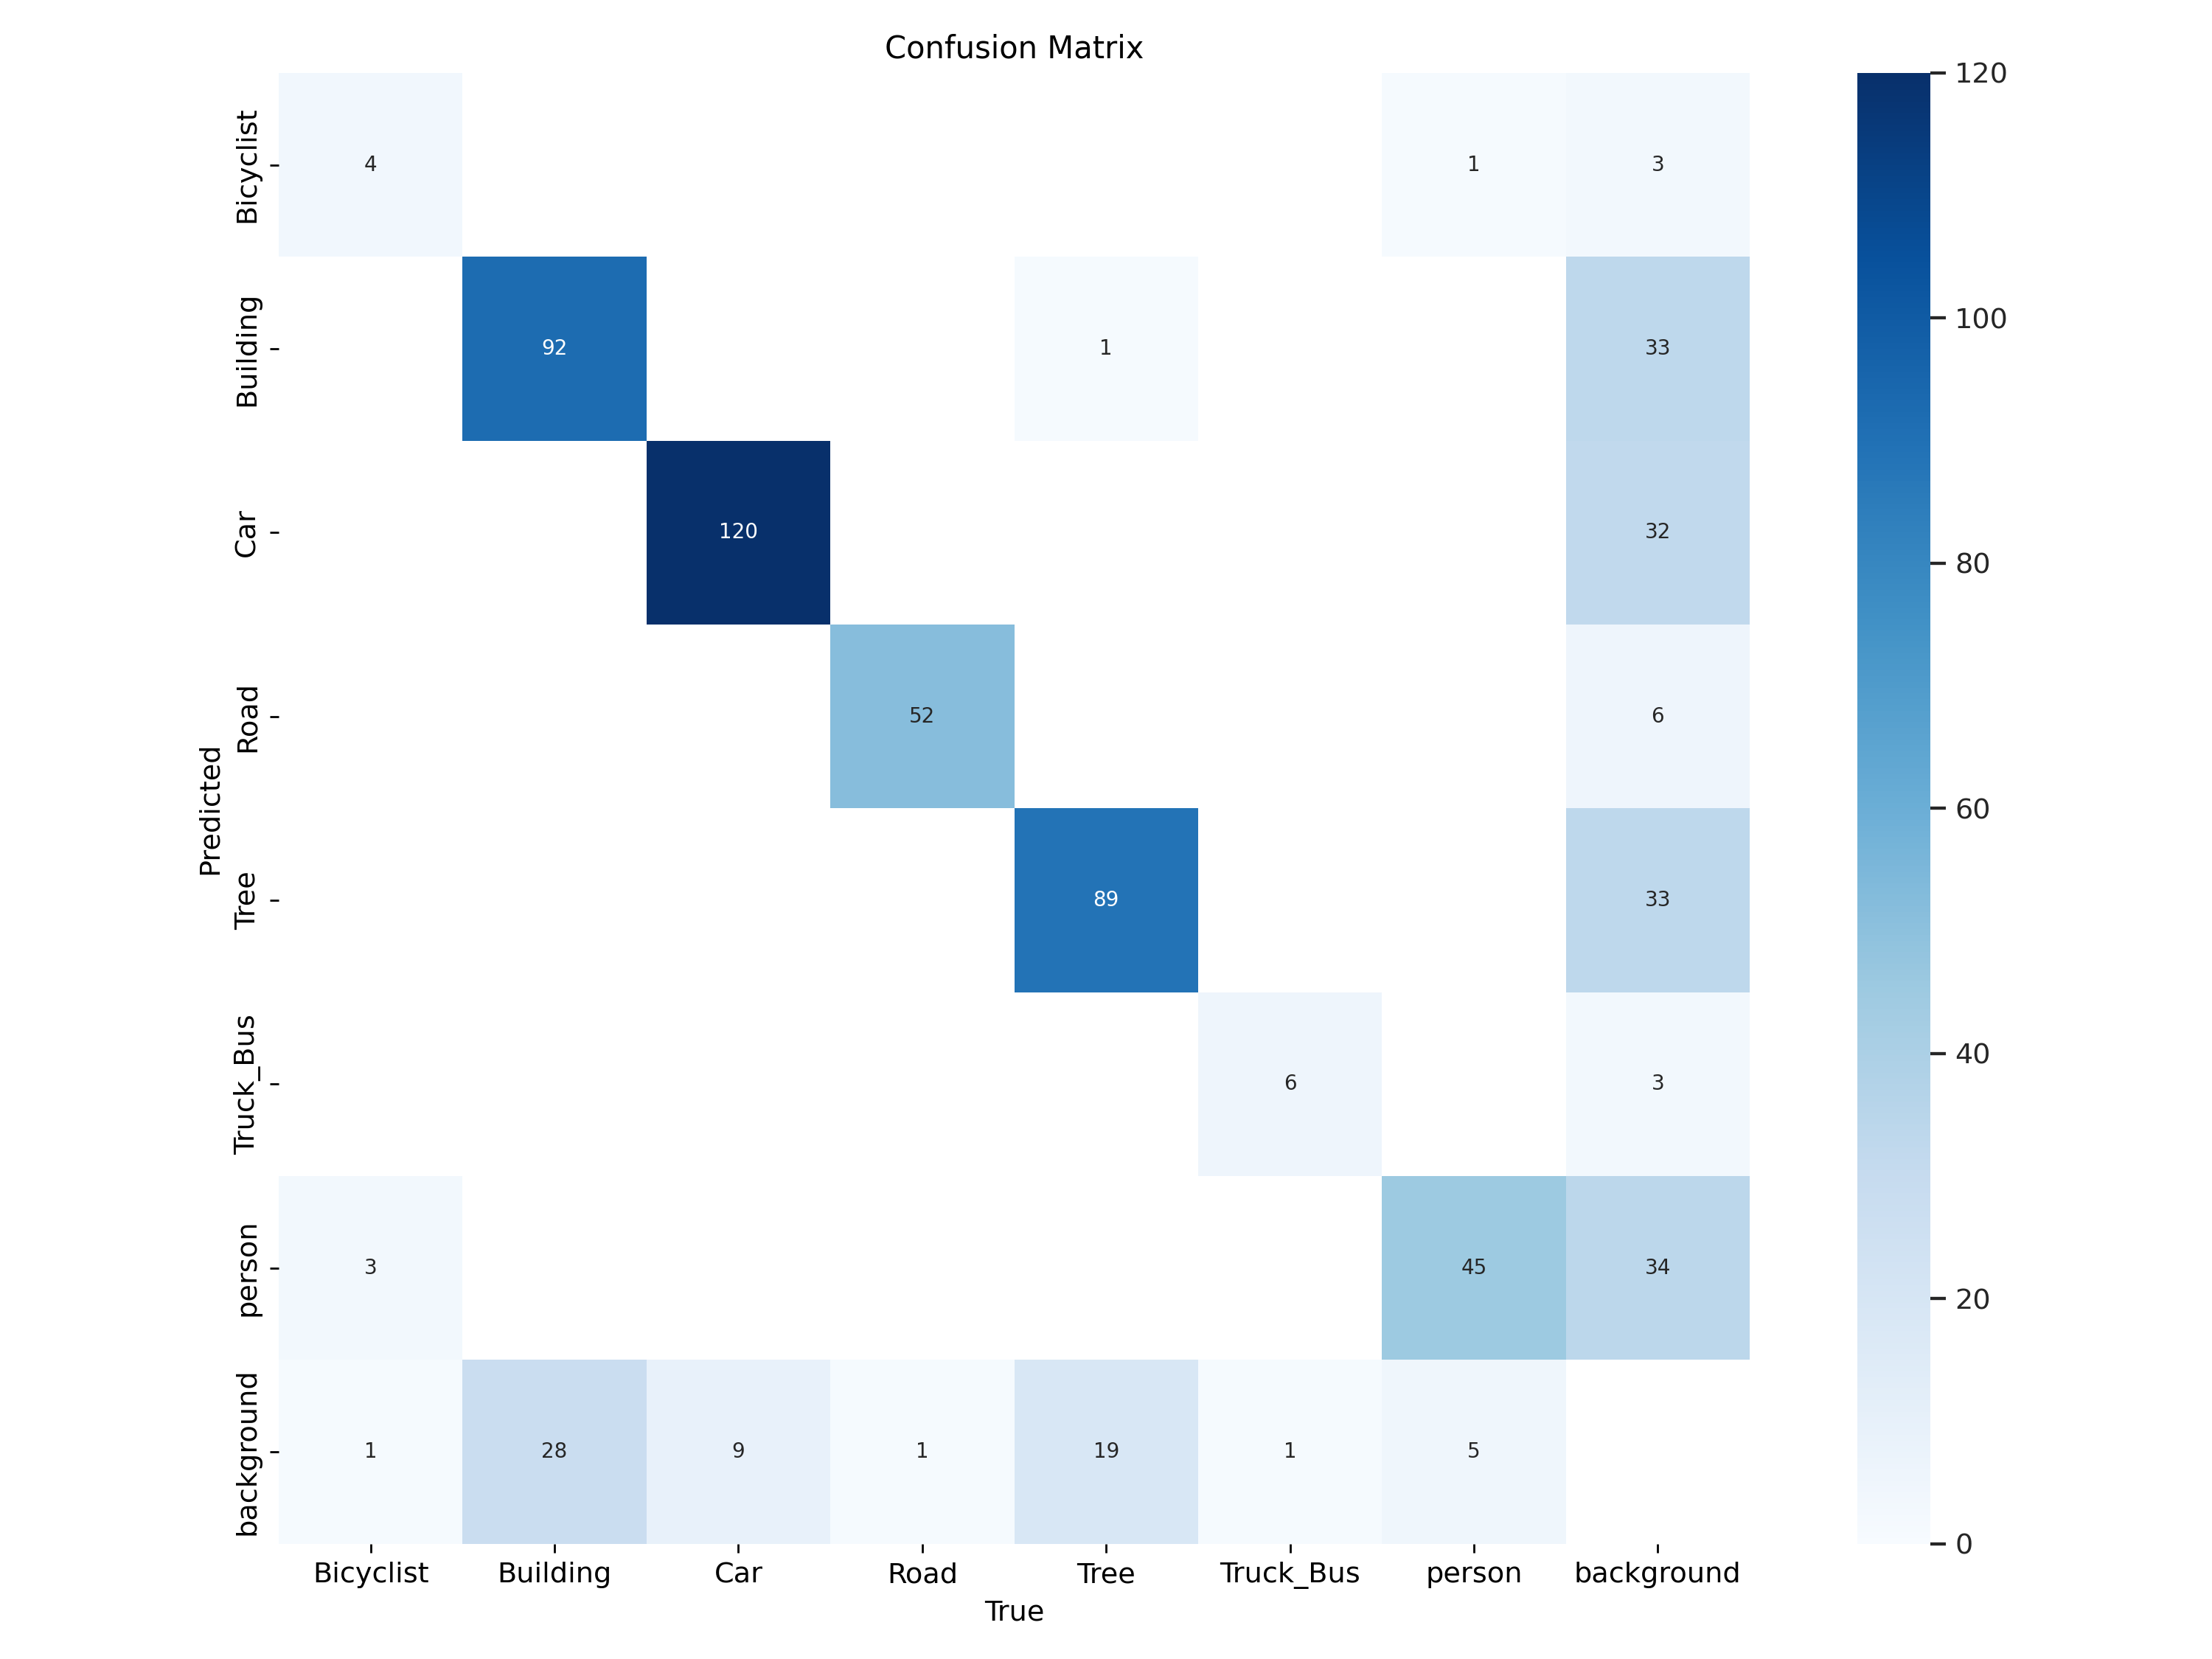

In [ ]:

Image(filename=f'/content/runs/segment/train/confusion_matrix.png', width=600)

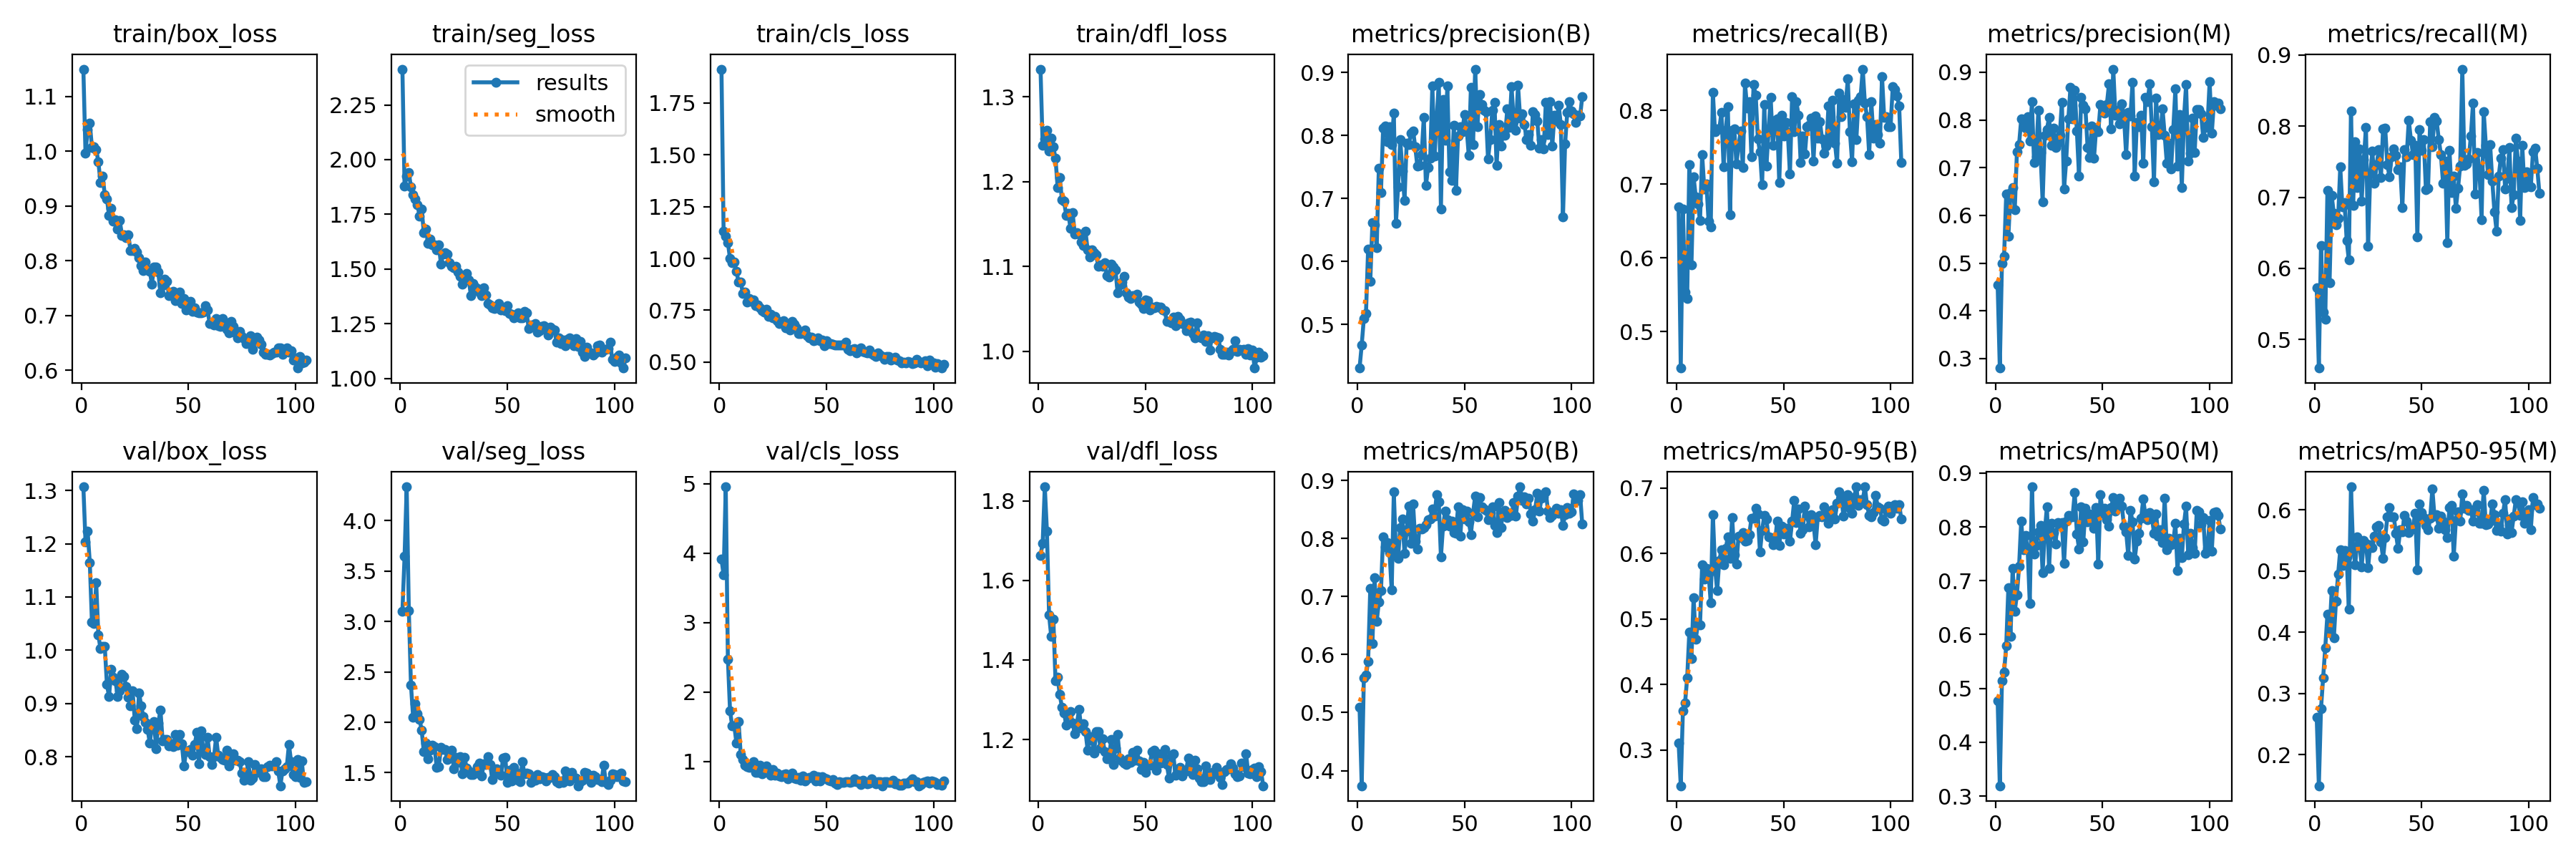

In [ ]:

Image(filename=f'/content/runs/segment/train/results.png', width=600)

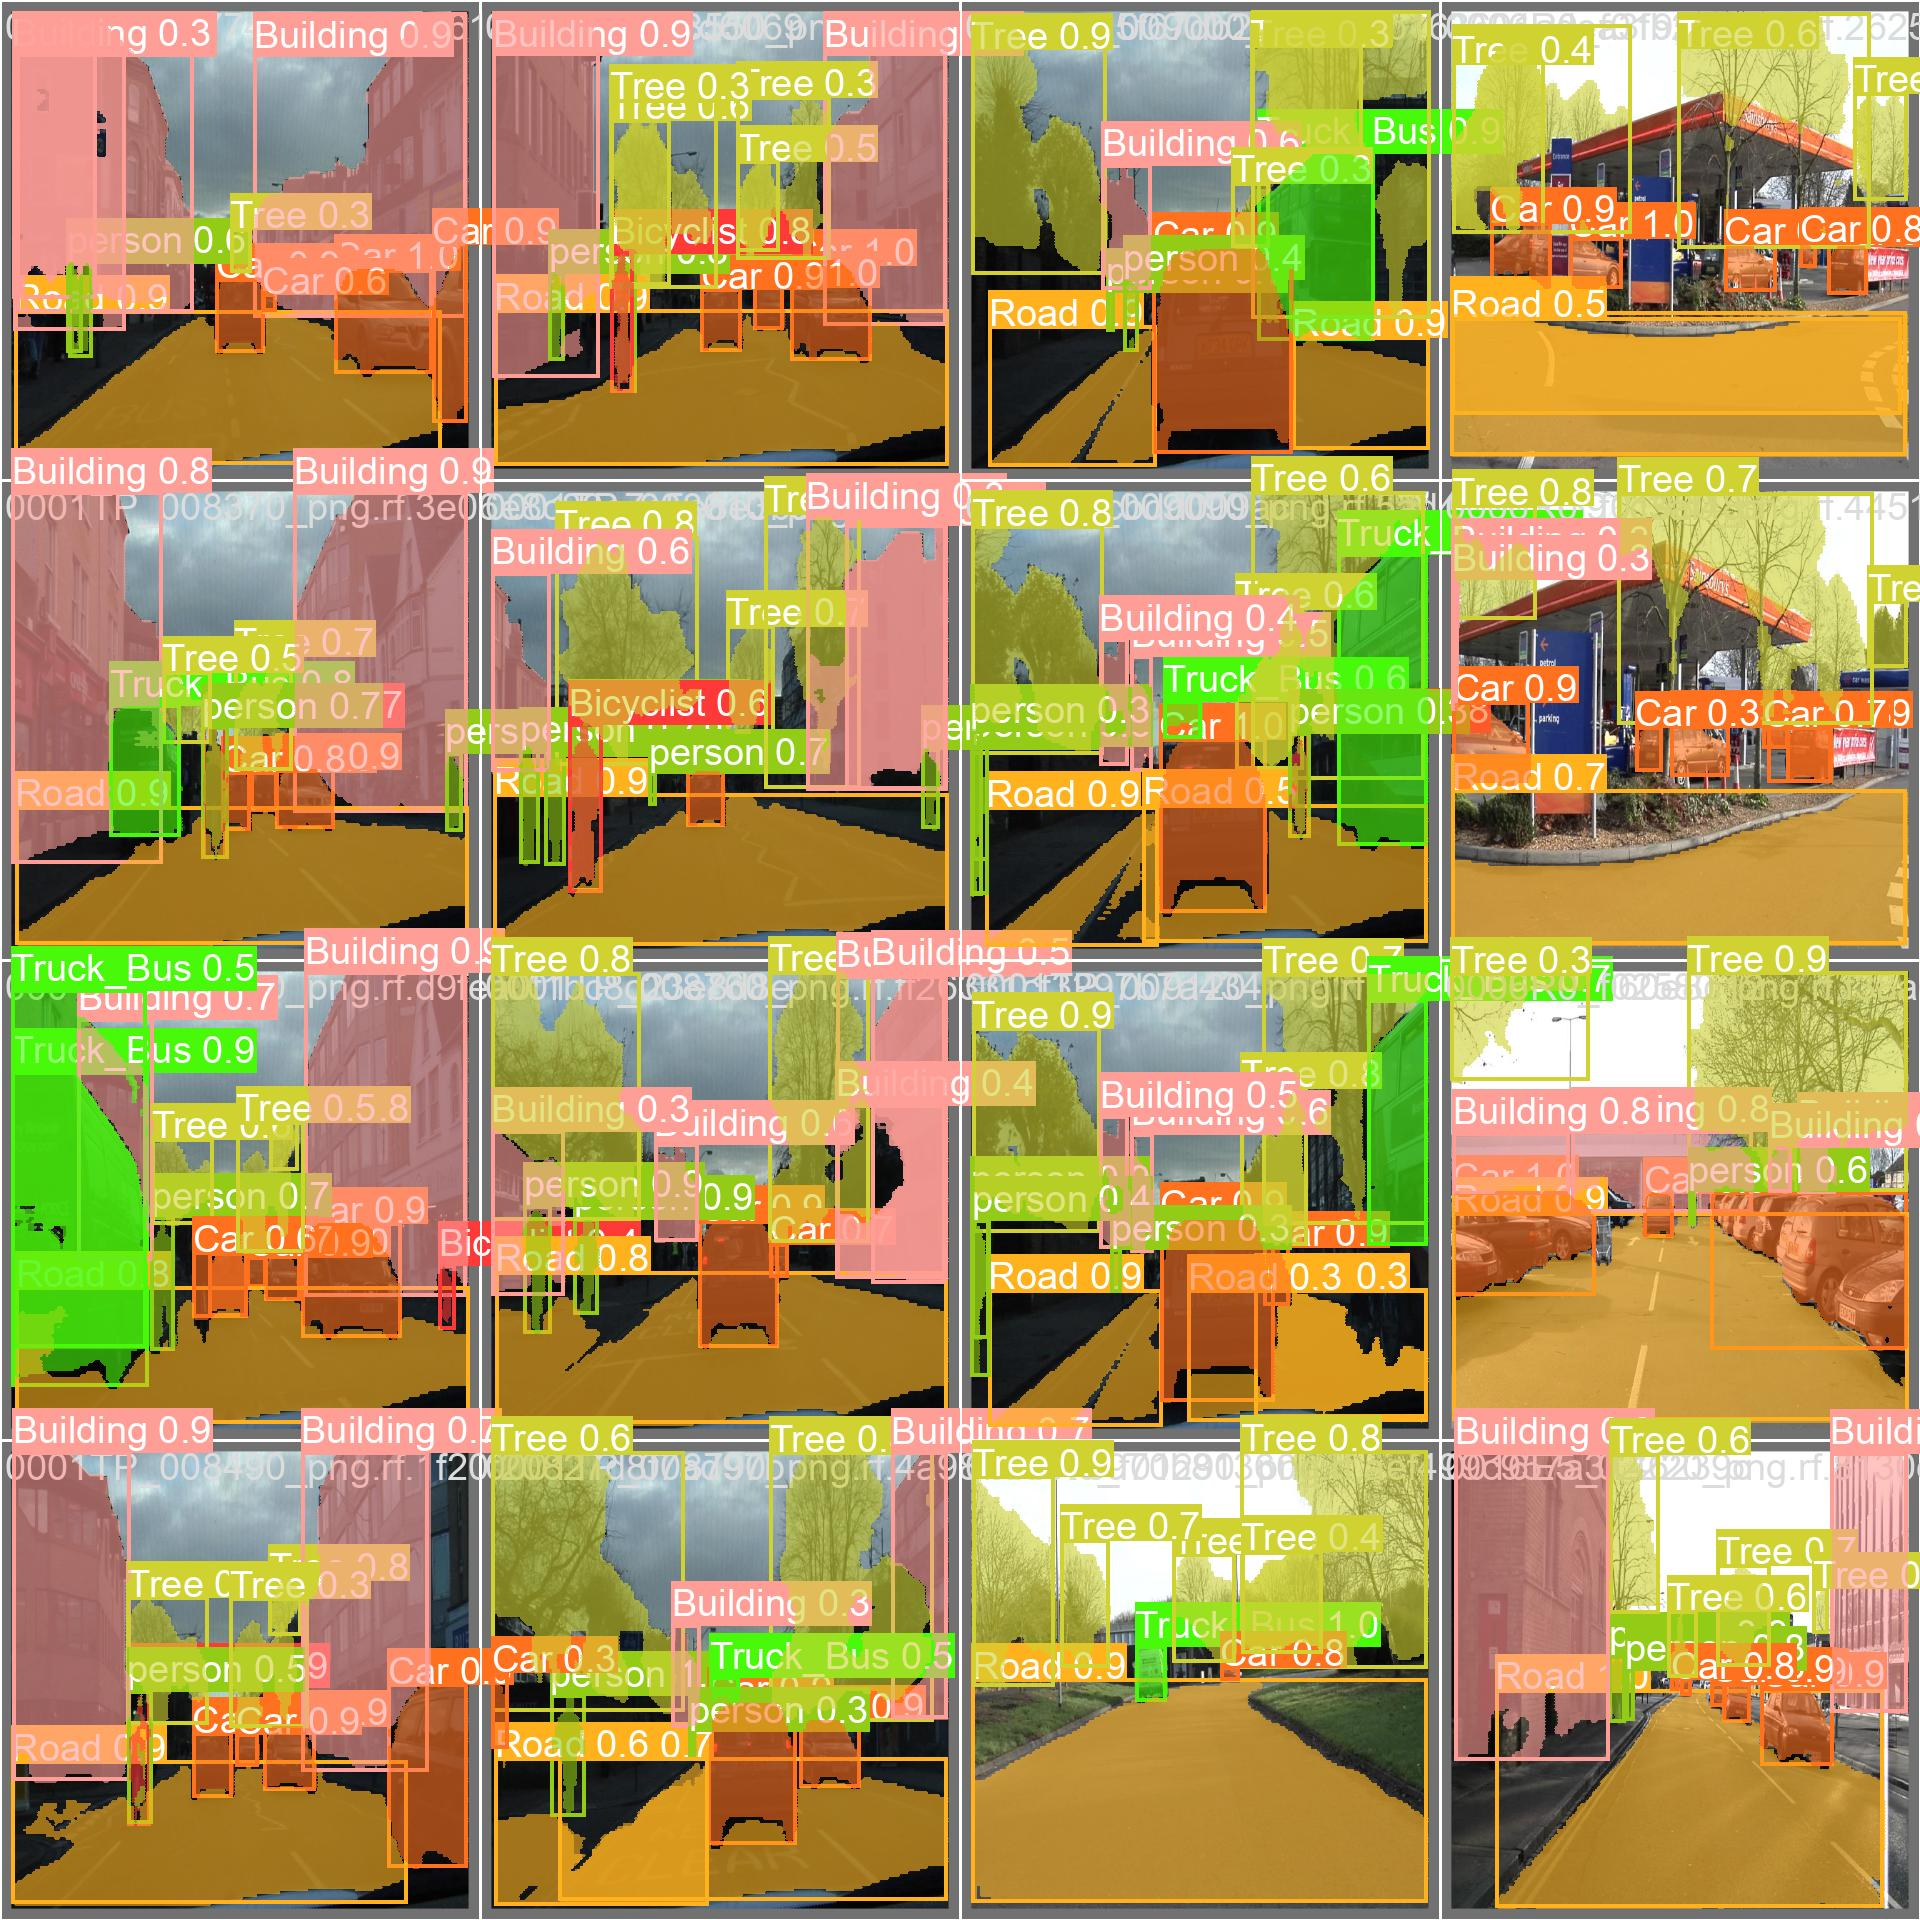

In [ ]:

Image(filename=f'/content/runs/segment/train/val_batch0_pred.jpg', width=600)

## Validate Custom Model

In [ ]:


!yolo task=segment mode=val model=/content/runs/segment/train/weights/best.pt data=/content/abc-2/data.yaml

Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.3.1+cu121 CUDA:0 (NVIDIA L4, 22700MiB)
YOLOv8l-seg summary (fused): 295 layers, 45917285 parameters, 0 gradients, 220.2 GFLOPs
val: Scanning /content/abc-2/valid/labels.cache... 50 images, 0 backgrounds, 0 corrupt: 100% 50/50 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100% 4/4 [00:06<00:00,  1.62s/it]
                   all         50        477      0.905      0.771      0.872      0.678      0.906      0.772      0.855      0.635
             Bicyclist         50          8      0.978       0.75      0.844       0.53      0.977       0.75      0.751       0.47
              Building         50        120      0.924      0.608      0.795      0.638      0.949      0.625      0.817      0.646
                   Car         50        129      0.906      0.902      0.931      0.777      0.899      0.895      0.914      0.691
       

## Inference with Custom Model

In [ ]:

!yolo task=segment mode=predict model=/content/runs/segment/train/weights/best.pt conf=0.25 source=/content/abc-2/test/images/ save=true

Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.3.1+cu121 CUDA:0 (NVIDIA L4, 22700MiB)
YOLOv8l-seg summary (fused): 295 layers, 45917285 parameters, 0 gradients, 220.2 GFLOPs

WARNING ⚠️ NMS time limit 0.550s exceeded
image 1/50 /content/abc-2/test/images/0001TP_006720_png.rf.b3ef294ebf754b839ecc9aa8c06b1562.jpg: 640x640 4 Buildings, 2 Cars, 1 Road, 3 Trees, 2 Truck_Buss, 1 person, 12.2ms
image 2/50 /content/abc-2/test/images/0001TP_007410_png.rf.270a324549f462722320fd2f56e750be.jpg: 640x640 1 Bicyclist, 1 Building, 3 Cars, 1 Road, 1 Tree, 1 Truck_Bus, 1 person, 13.0ms
image 3/50 /content/abc-2/test/images/0001TP_007590_png.rf.5d4610b1881b9bcd934053cfe6762189.jpg: 640x640 9 Buildings, 2 Cars, 1 Road, 1 Tree, 1 person, 12.3ms
image 4/50 /content/abc-2/test/images/0001TP_007680_png.rf.fb27f2b27e4e18772d7c99c81d491007.jpg: 640x640 3 Buildings, 5 Cars, 1 Road, 12.0ms
image 5/50 /content/abc-2/test/images/0001TP_007710_png.rf.20ba06f980a8c418a20df74f72c2e86d.jpg: 640x640 2 Buildings, 4 Ca

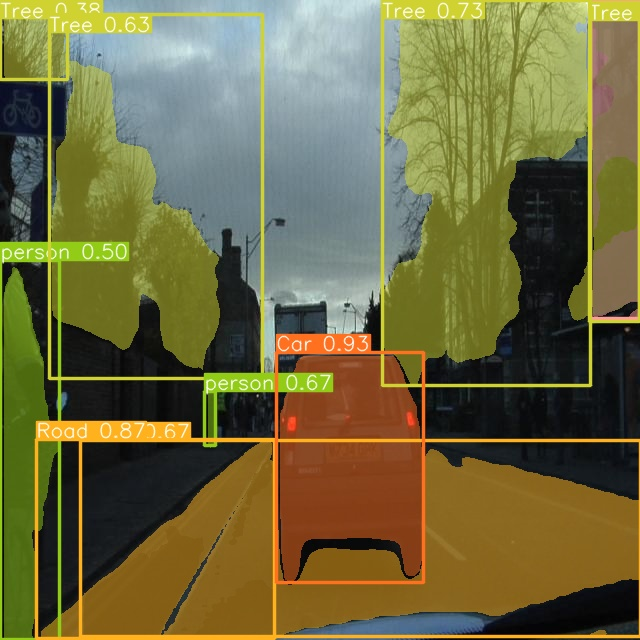

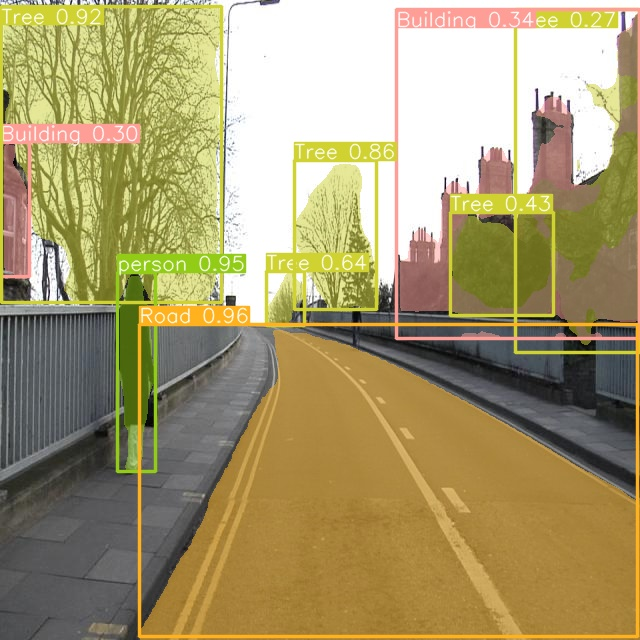

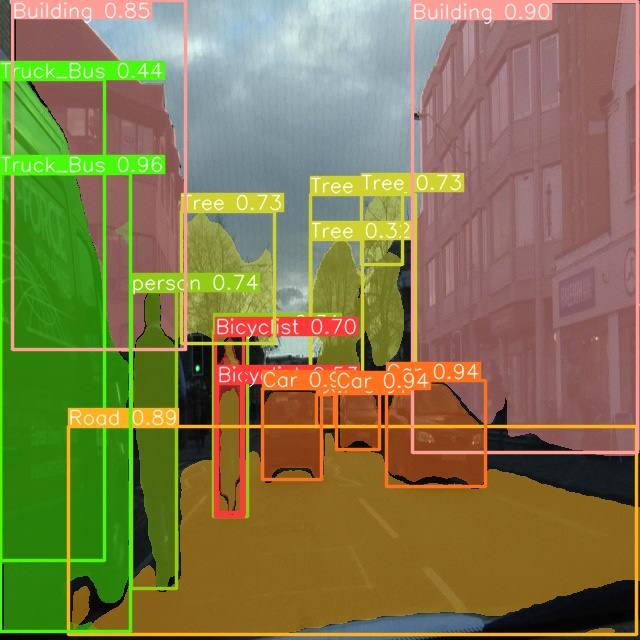

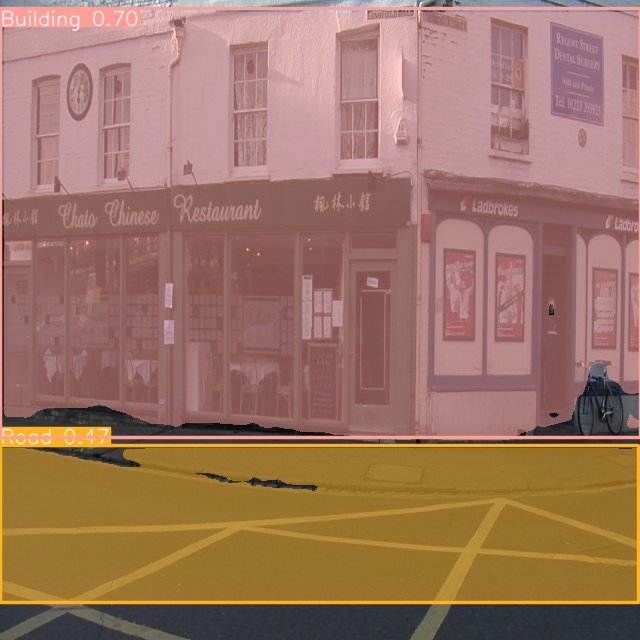

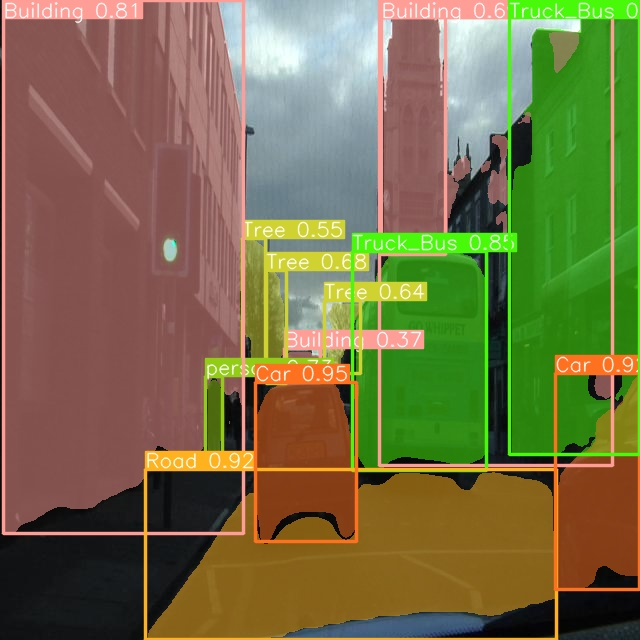

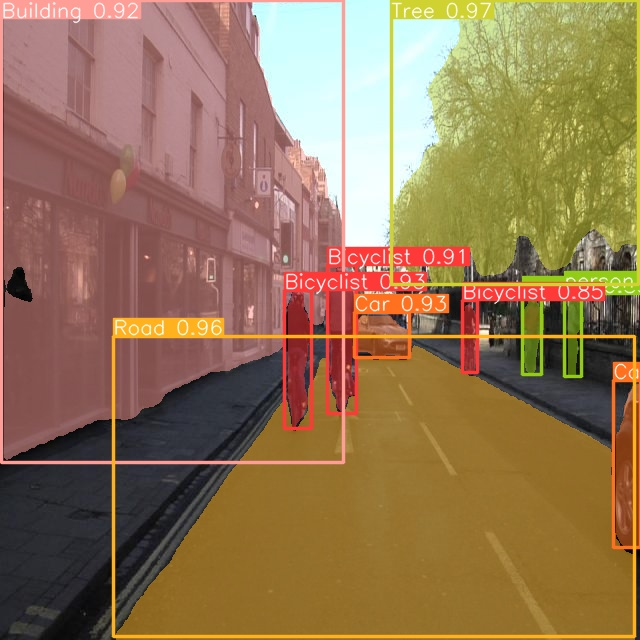

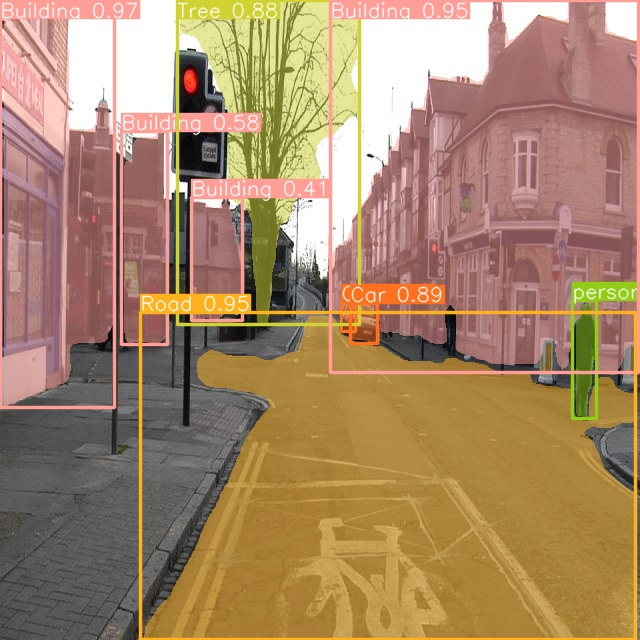

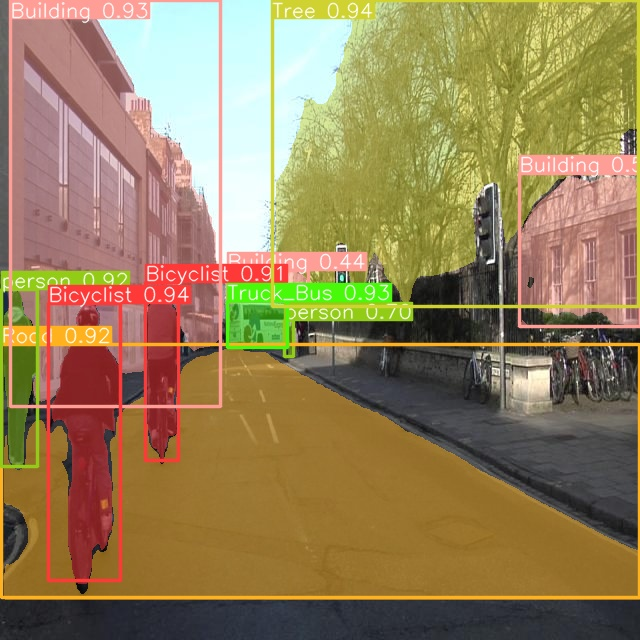

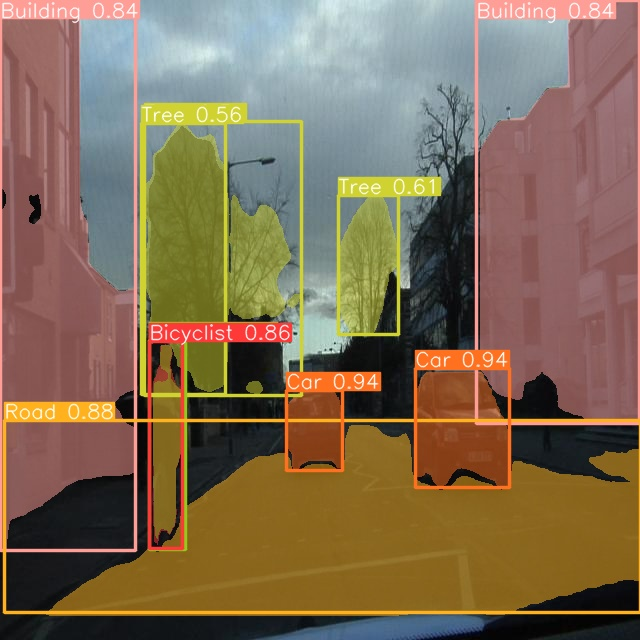

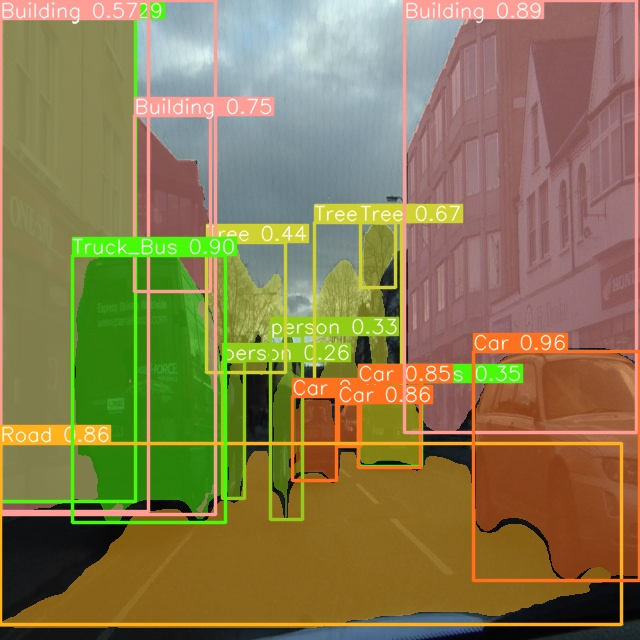

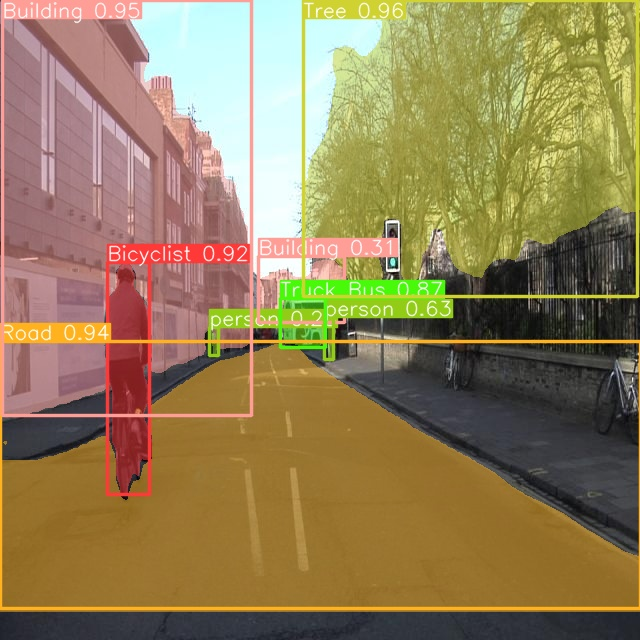

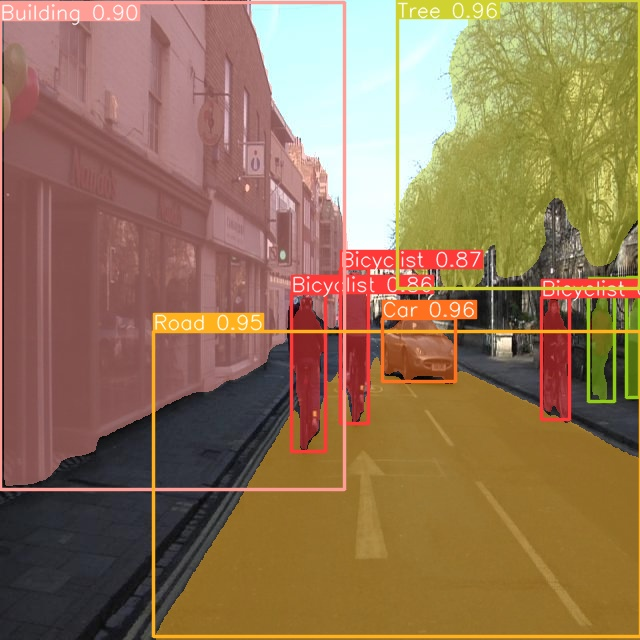

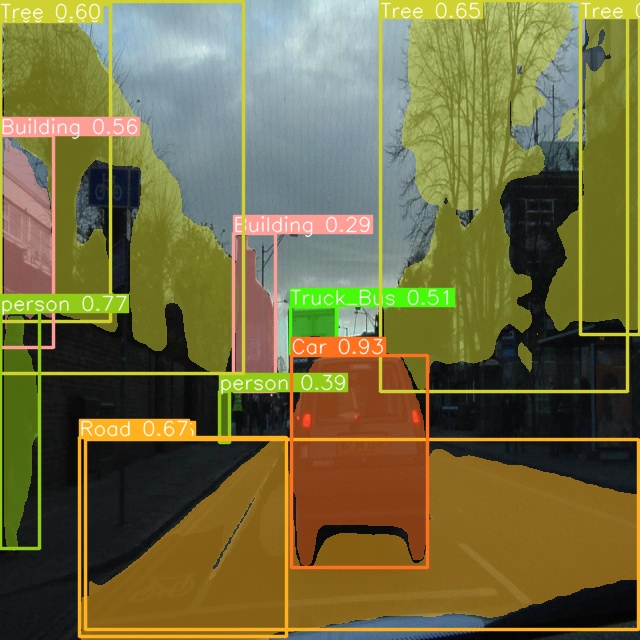

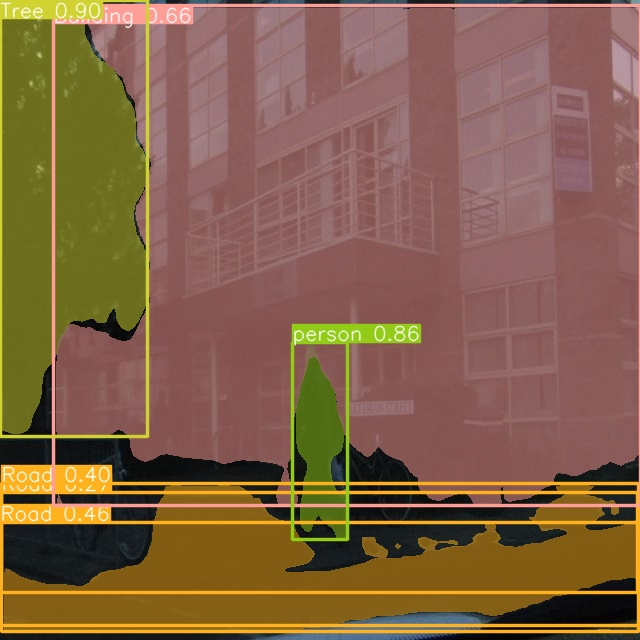

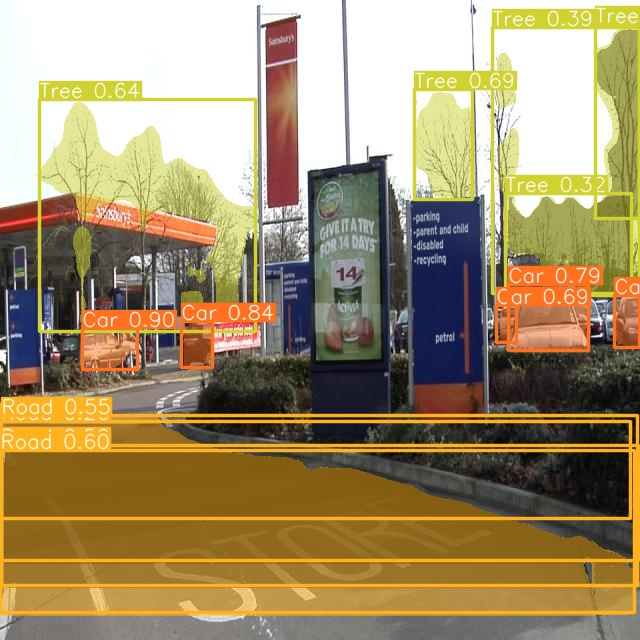

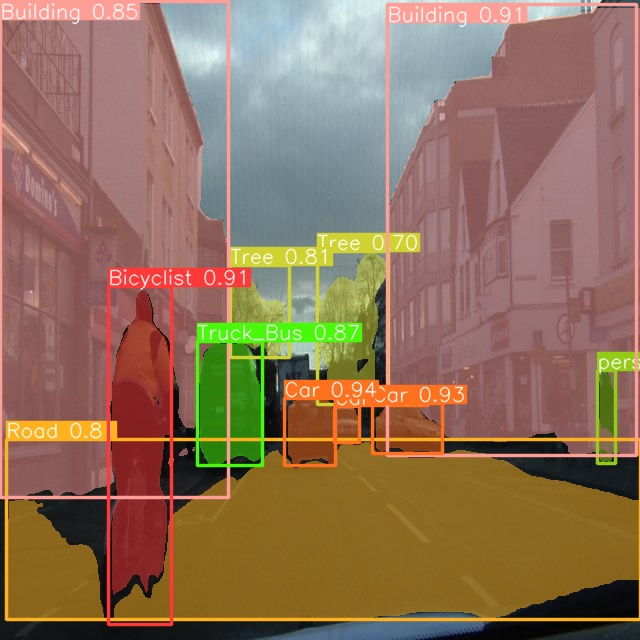

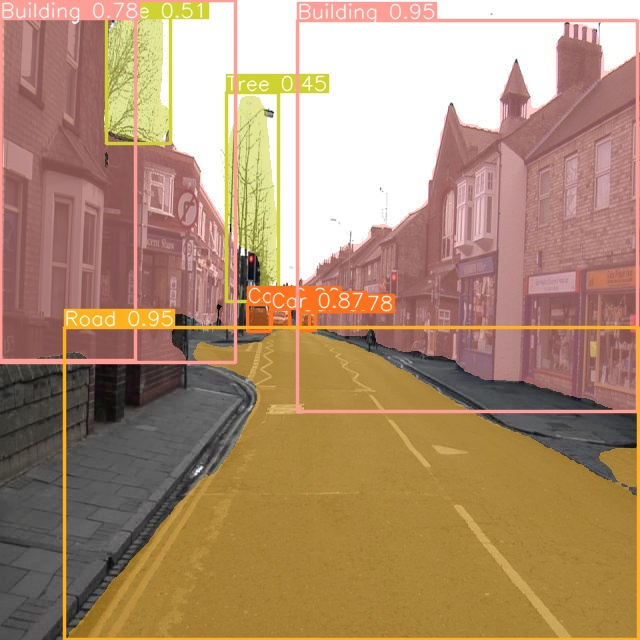

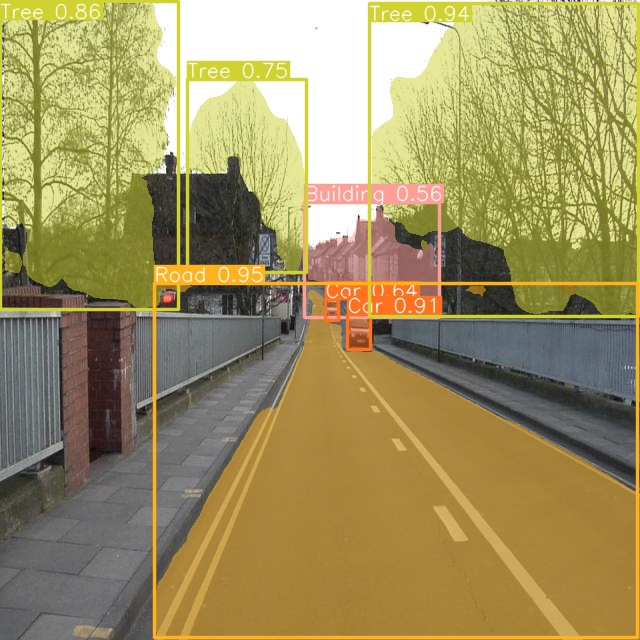

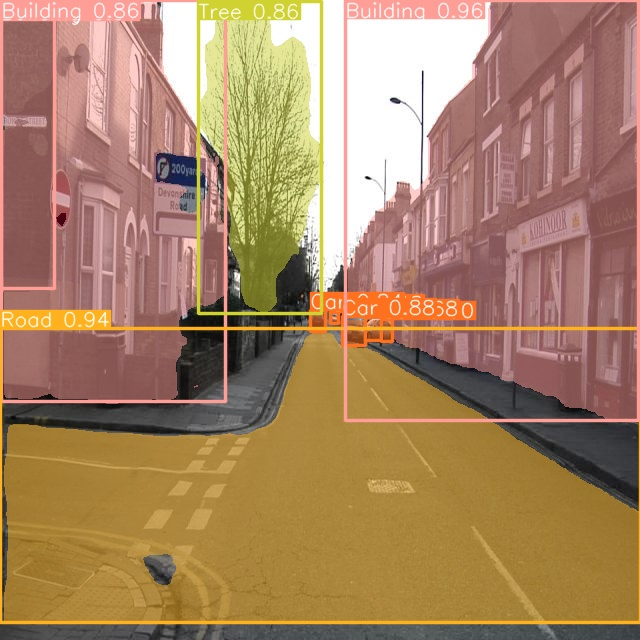

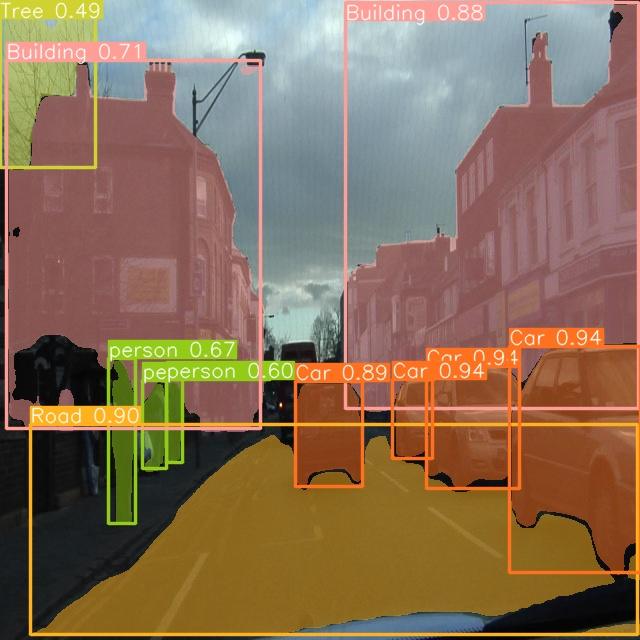

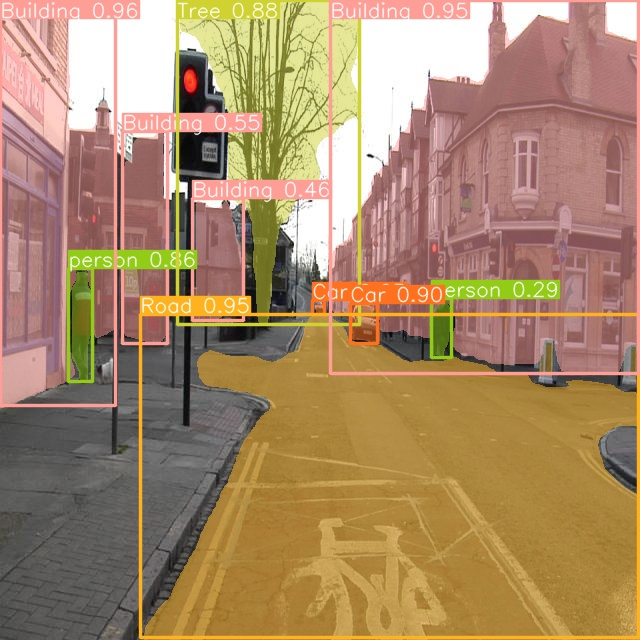

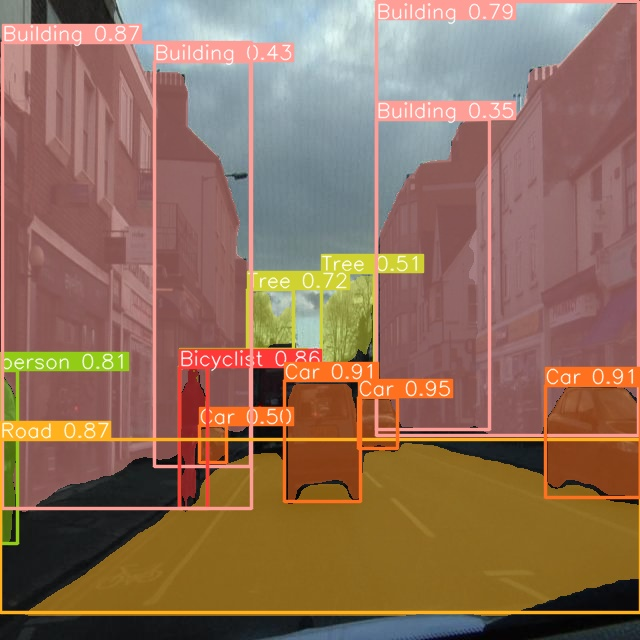

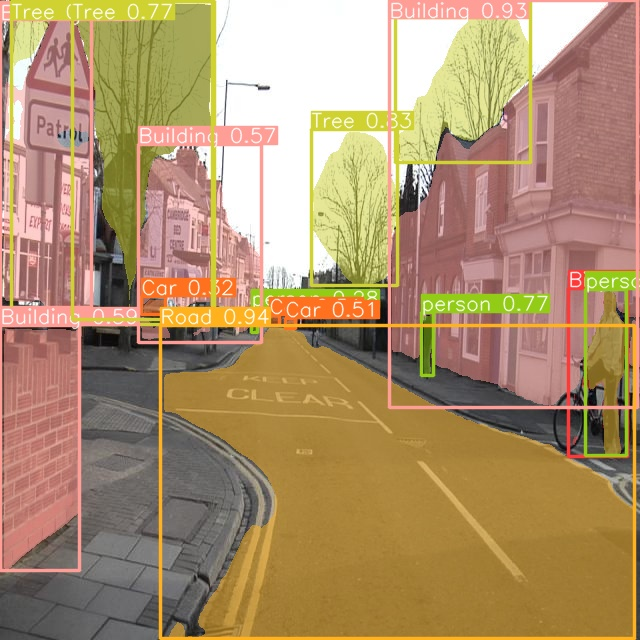

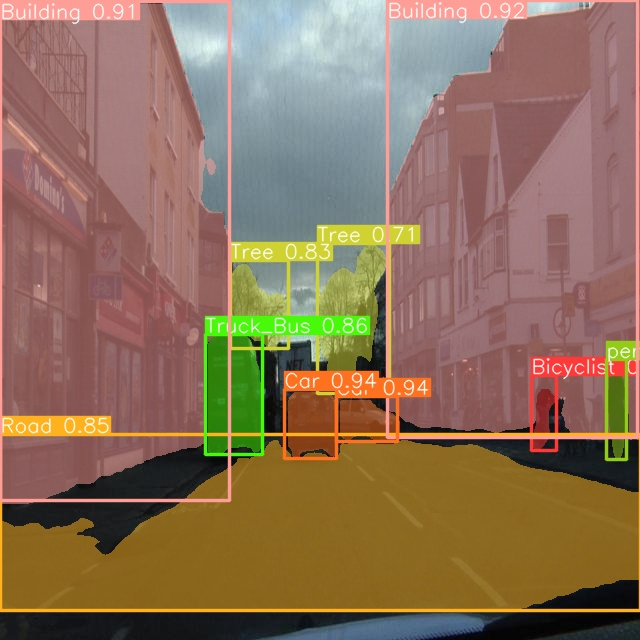

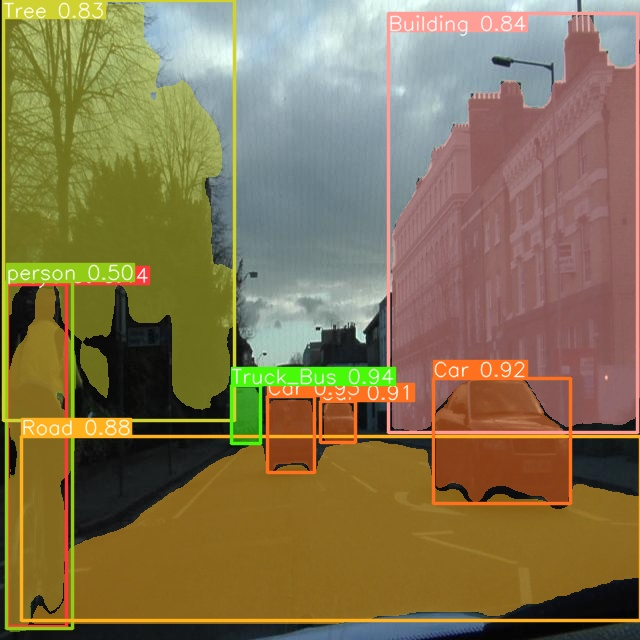

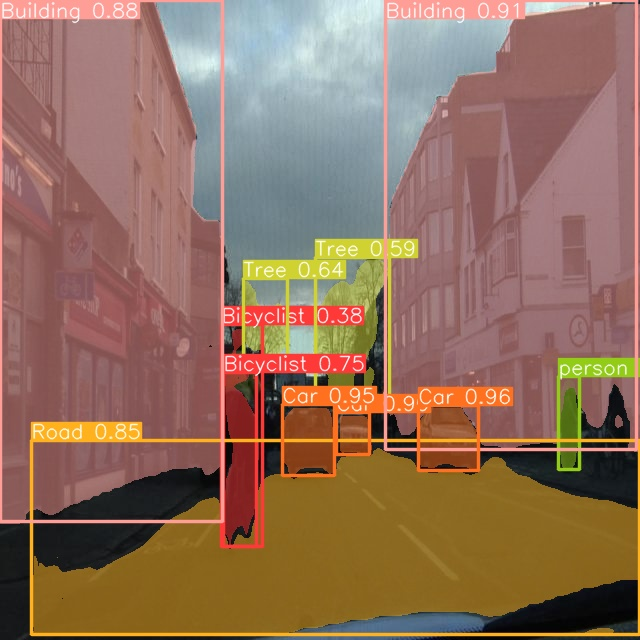

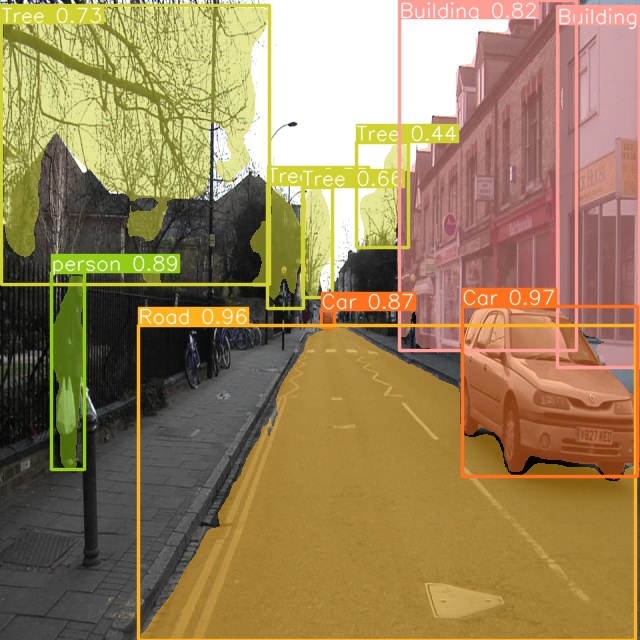

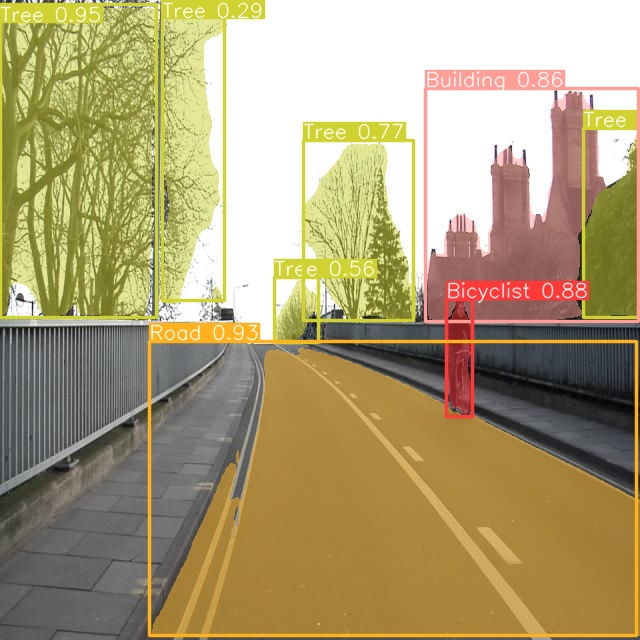

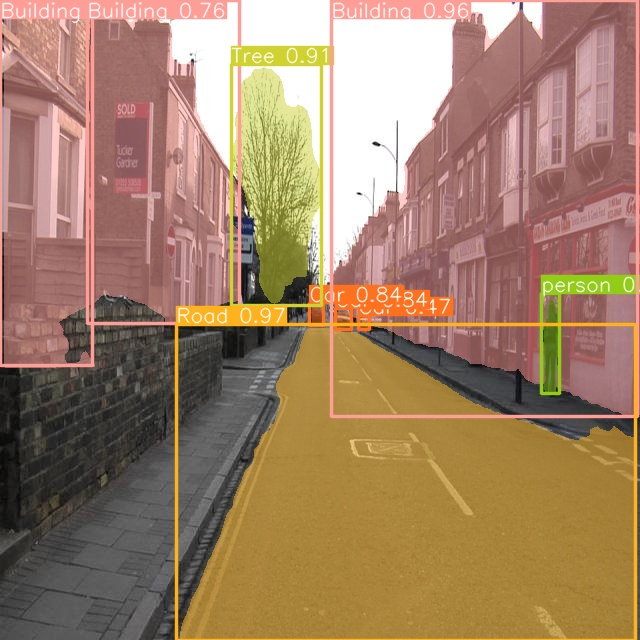

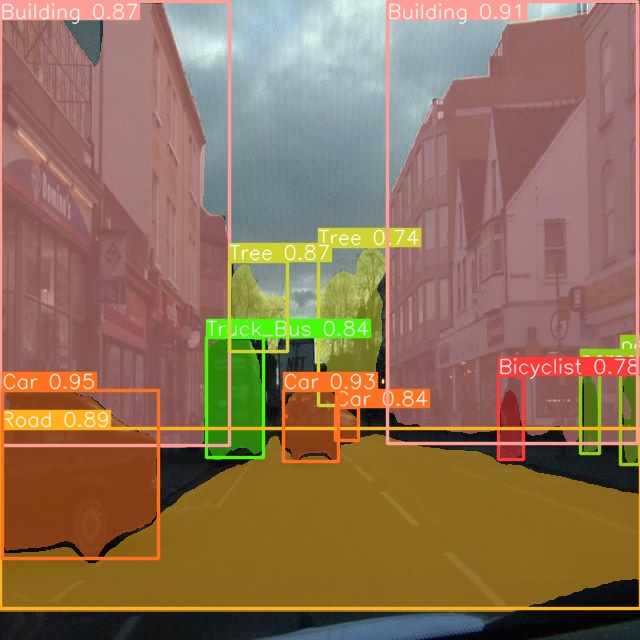

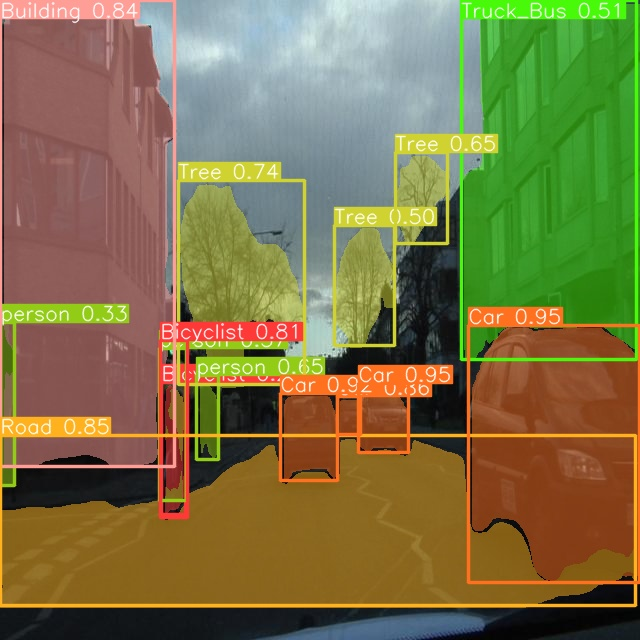

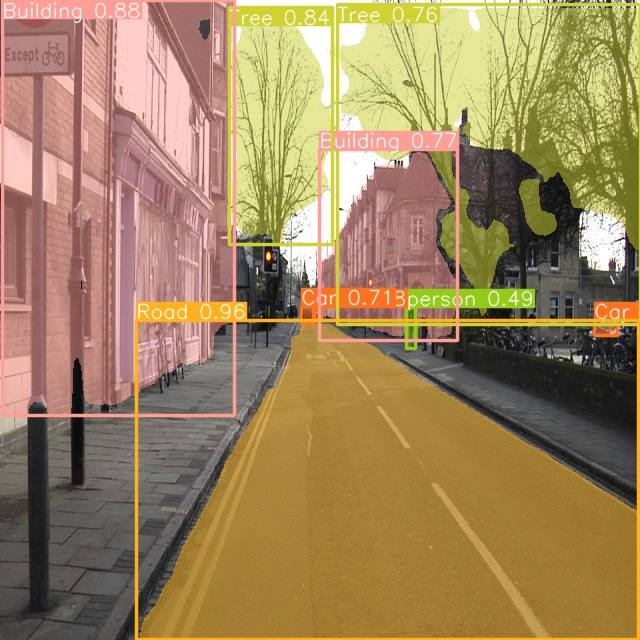

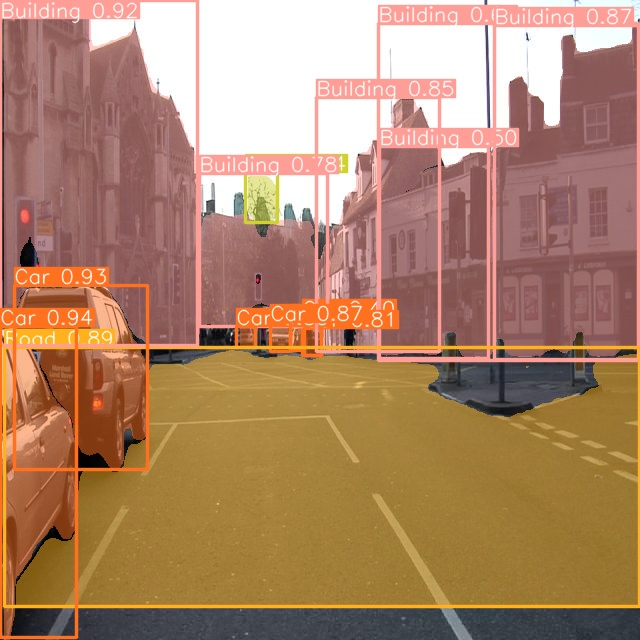

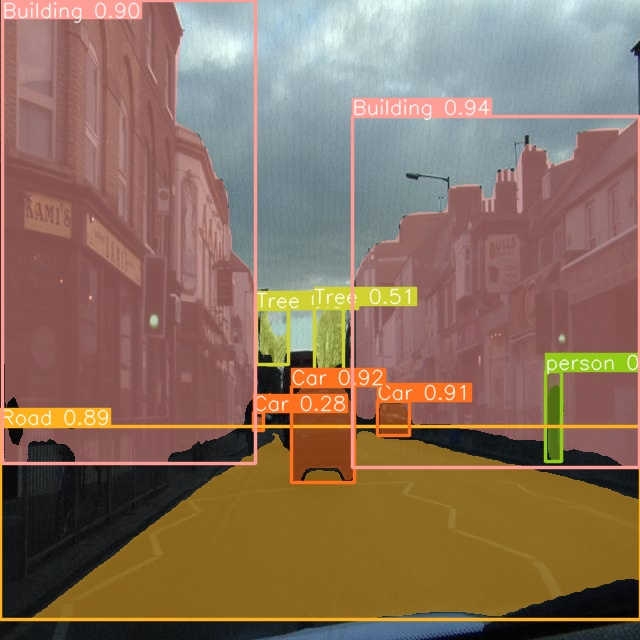

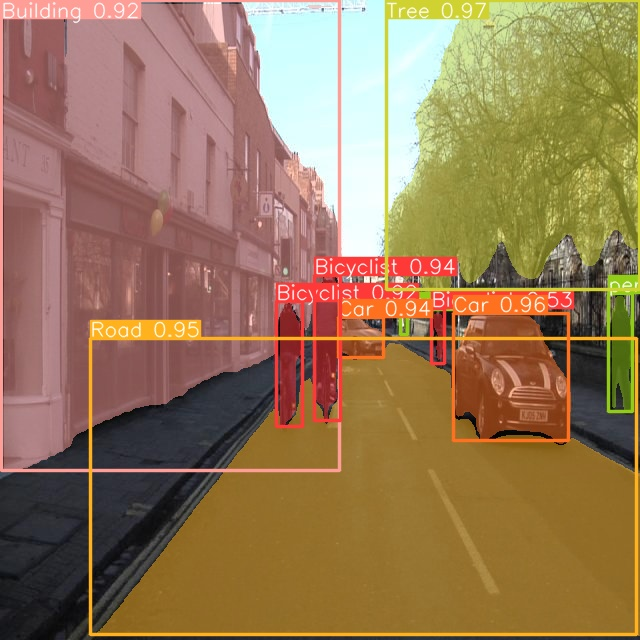

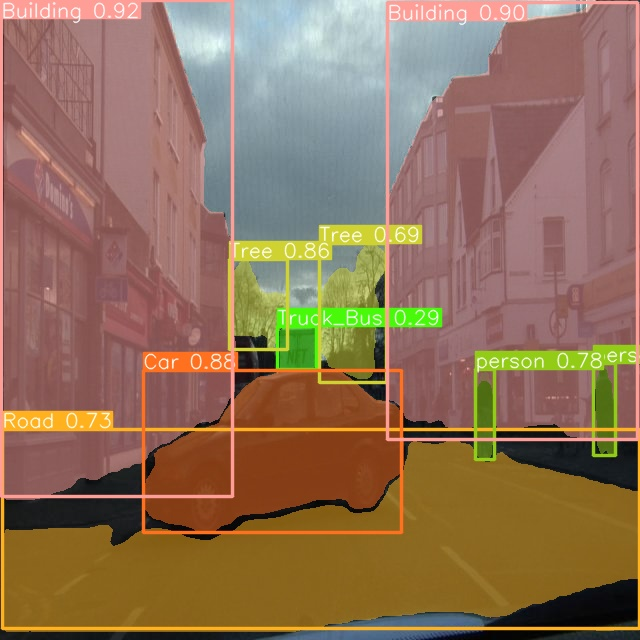

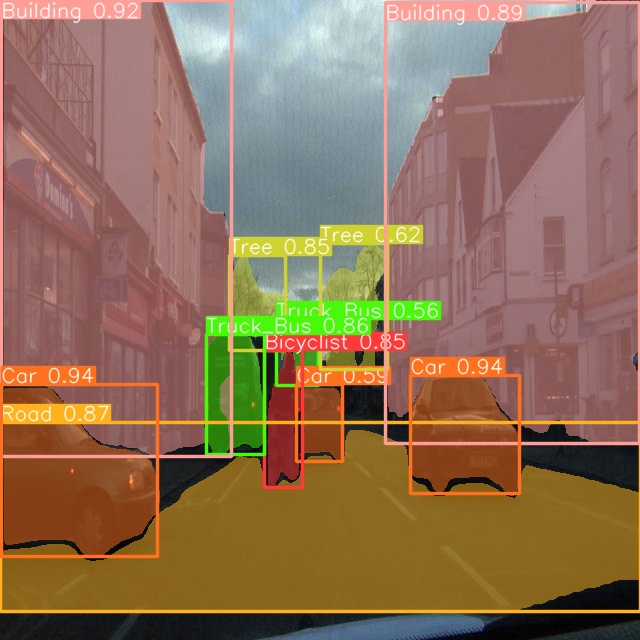

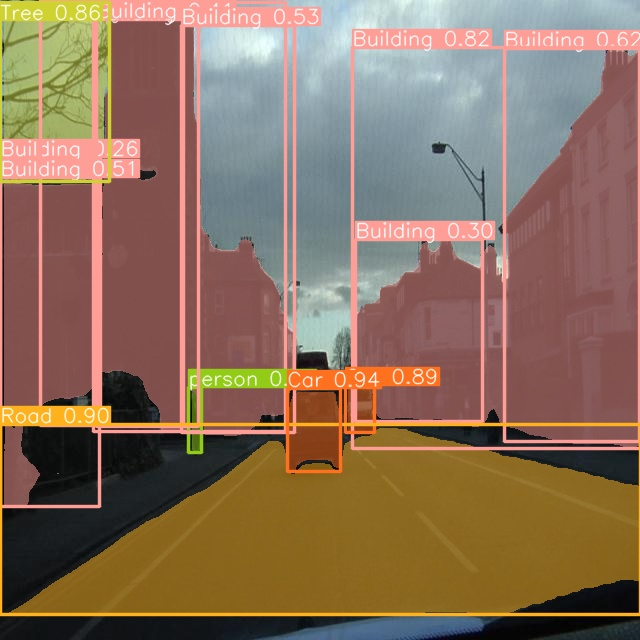

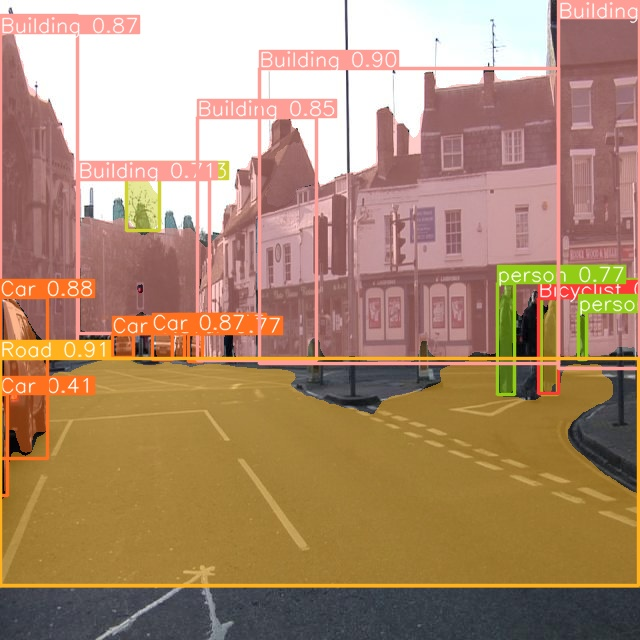

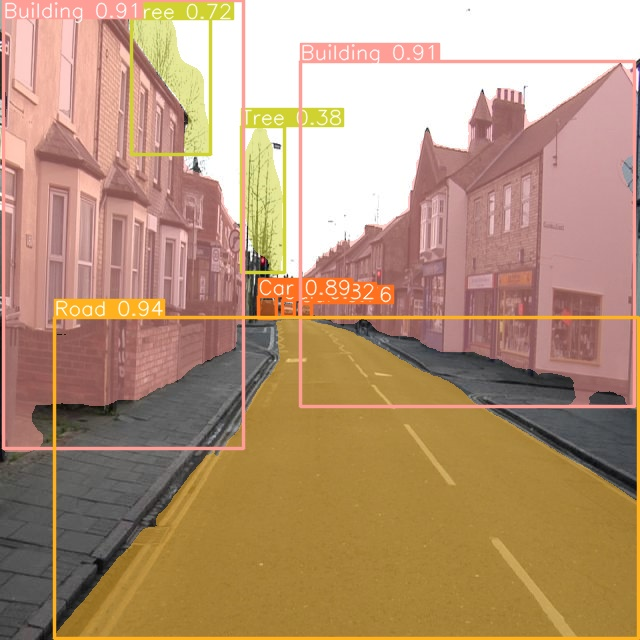

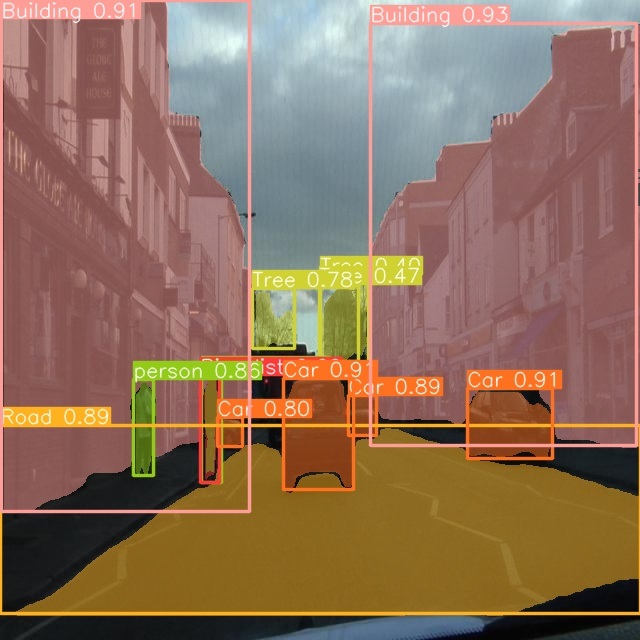

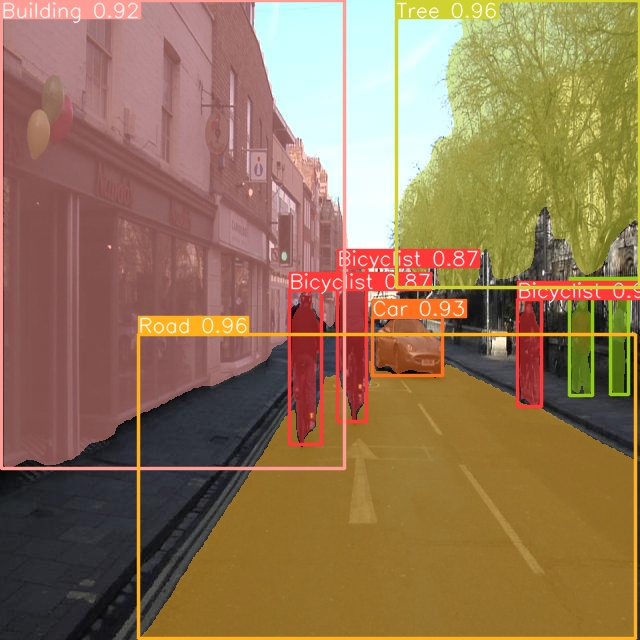

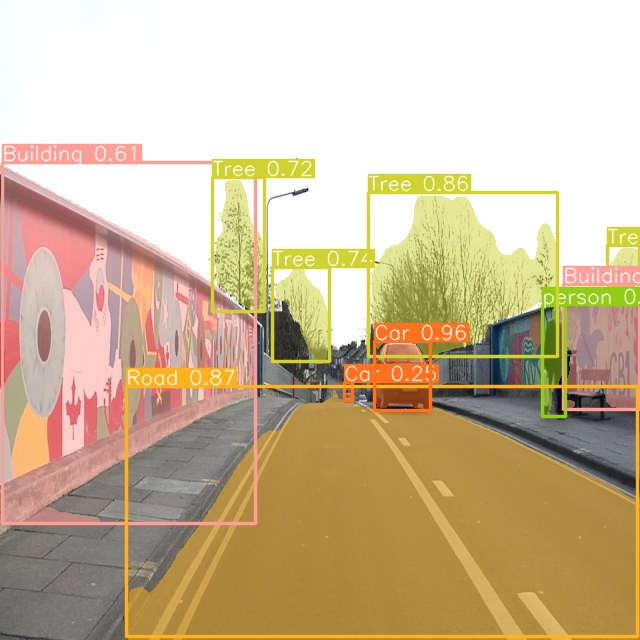

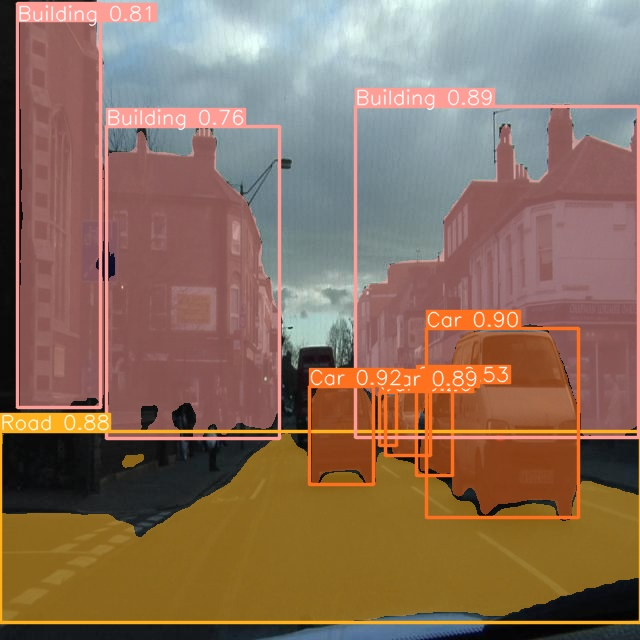

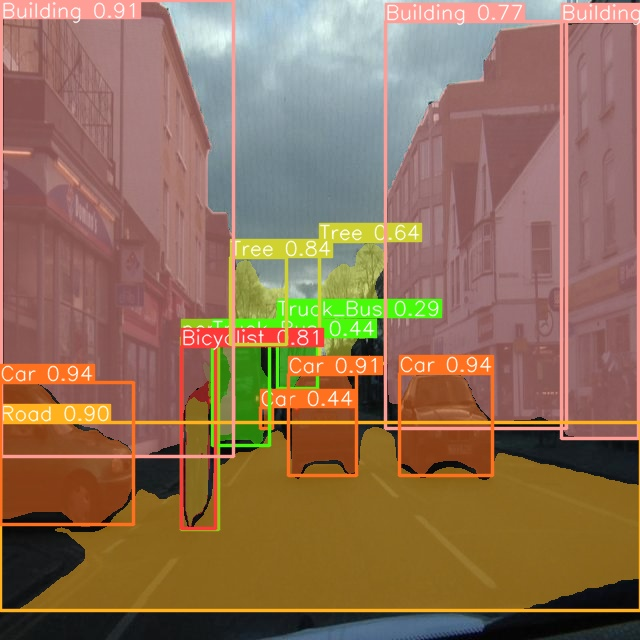

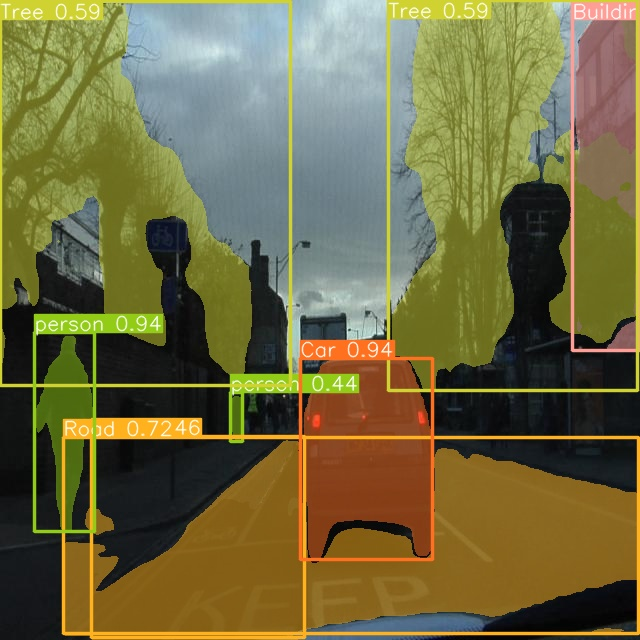

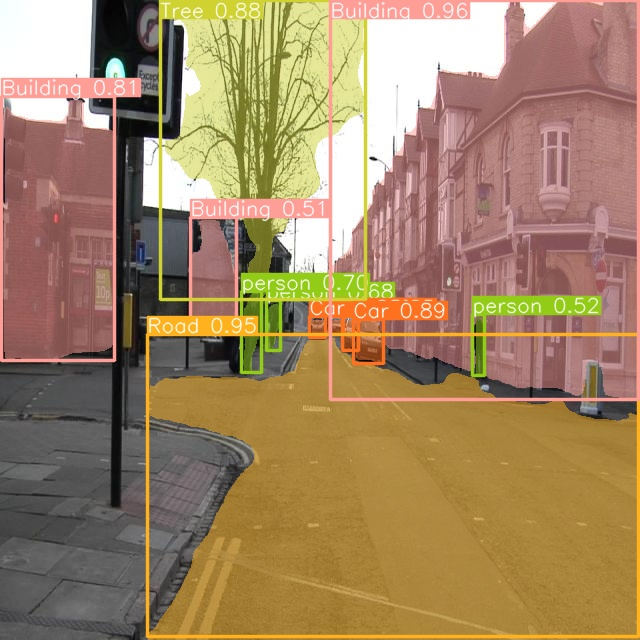

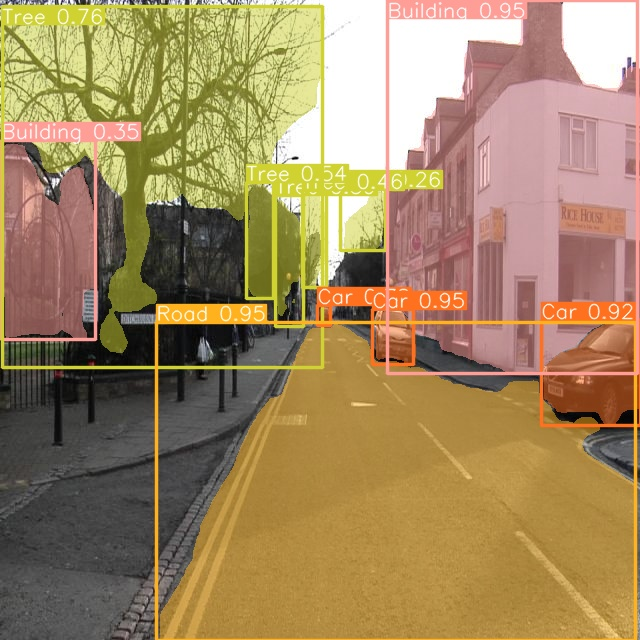

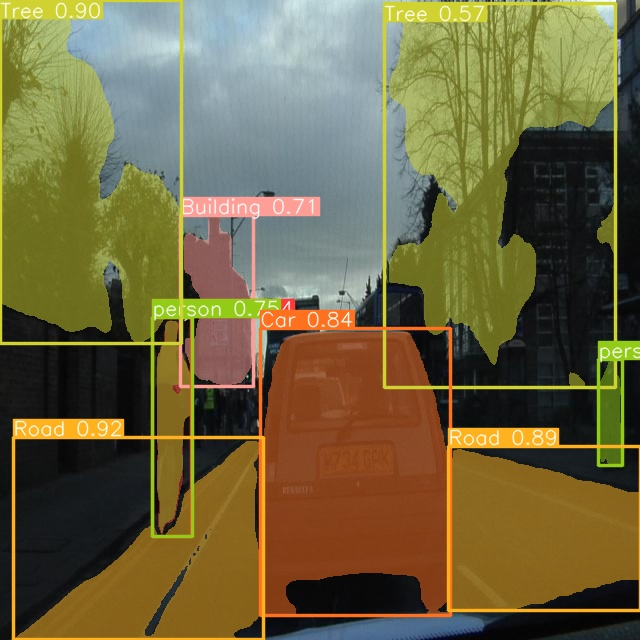

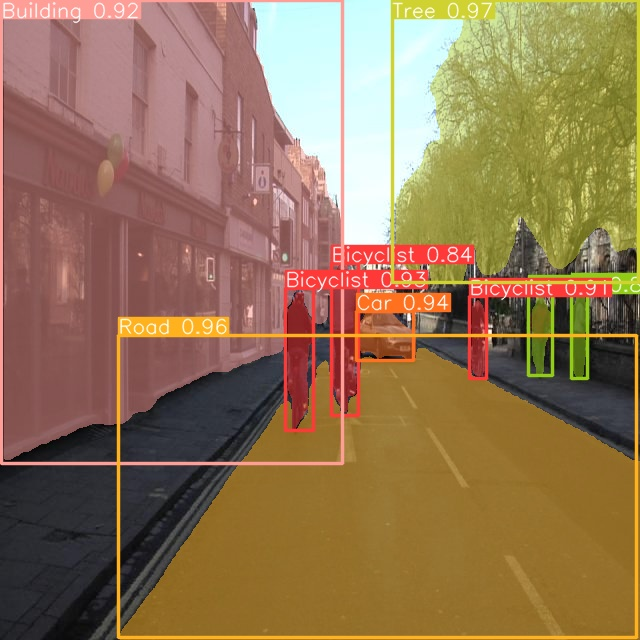

In [ ]:
import glob
from IPython.display import Image, display

for image_path in glob.glob(f'/content/runs/segment/predict/*.jpg'):
      display(Image(filename=image_path, height=600))
      print("\n")